In [3]:
# import dependencies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.utils import resample
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import pickle

In [4]:
data = pd.read_csv("Rainfall.csv")

In [5]:
data.head()

,day,pressure,maxtemp,temparature,mintemp,dewpoint,humidity,cloud,rainfall,sunshine,winddirection,windspeed
0,1,1025.9,19.9,18.3,16.8,13.1,72,49,yes,9.3,80.0,26.3
1,2,1022.0,21.7,18.9,17.2,15.6,81,83,yes,0.6,50.0,15.3
2,3,1019.7,20.3,19.3,18.0,18.4,95,91,yes,0.0,40.0,14.2
3,4,1018.9,22.3,20.6,19.1,18.8,90,88,yes,1.0,50.0,16.9
4,5,1015.9,21.3,20.7,20.2,19.9,95,81,yes,0.0,40.0,13.7


In [6]:
data.tail()

,day,pressure,maxtemp,temparature,mintemp,dewpoint,humidity,cloud,rainfall,sunshine,winddirection,windspeed
361,27,1022.7,18.8,17.7,16.9,15.0,84,90,yes,0.0,30.0,18.4
362,28,1026.6,18.6,17.3,16.3,12.8,75,85,yes,1.0,20.0,25.9
363,29,1025.9,18.9,17.7,16.4,13.3,75,78,yes,4.6,70.0,33.4
364,30,1025.3,19.2,17.3,15.2,13.3,78,86,yes,1.2,20.0,20.9
365,31,1026.4,20.5,17.8,15.5,13.0,74,66,no,5.7,20.0,23.3


In [7]:
data.shape

(366, 12)

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 366 entries, 0 to 365
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   day                     366 non-null    int64  
 1   pressure                366 non-null    float64
 2   maxtemp                 366 non-null    float64
 3   temparature             366 non-null    float64
 4   mintemp                 366 non-null    float64
 5   dewpoint                366 non-null    float64
 6   humidity                366 non-null    int64  
 7   cloud                   366 non-null    int64  
 8   rainfall                366 non-null    object 
 9   sunshine                366 non-null    float64
 10           winddirection  365 non-null    float64
 11  windspeed               365 non-null    float64
dtypes: float64(8), int64(3), object(1)
memory usage: 34.4+ KB


In [9]:
data.columns = data.columns.str.strip() # remove extra space

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 366 entries, 0 to 365
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   day            366 non-null    int64  
 1   pressure       366 non-null    float64
 2   maxtemp        366 non-null    float64
 3   temparature    366 non-null    float64
 4   mintemp        366 non-null    float64
 5   dewpoint       366 non-null    float64
 6   humidity       366 non-null    int64  
 7   cloud          366 non-null    int64  
 8   rainfall       366 non-null    object 
 9   sunshine       366 non-null    float64
 10  winddirection  365 non-null    float64
 11  windspeed      365 non-null    float64
dtypes: float64(8), int64(3), object(1)
memory usage: 34.4+ KB


In [11]:
# drop day column
data = data.drop(columns=["day"])

In [12]:
data.head()

,pressure,maxtemp,temparature,mintemp,dewpoint,humidity,cloud,rainfall,sunshine,winddirection,windspeed
0,1025.9,19.9,18.3,16.8,13.1,72,49,yes,9.3,80.0,26.3
1,1022.0,21.7,18.9,17.2,15.6,81,83,yes,0.6,50.0,15.3
2,1019.7,20.3,19.3,18.0,18.4,95,91,yes,0.0,40.0,14.2
3,1018.9,22.3,20.6,19.1,18.8,90,88,yes,1.0,50.0,16.9
4,1015.9,21.3,20.7,20.2,19.9,95,81,yes,0.0,40.0,13.7


In [13]:
# checking any missing values
data.isnull().sum()

pressure         0
maxtemp          0
temparature      0
mintemp          0
dewpoint         0
humidity         0
cloud            0
rainfall         0
sunshine         0
winddirection    1
windspeed        1
dtype: int64

In [14]:
# handling missing values
data["winddirection"] = data["winddirection"].fillna(data["winddirection"].mode()[0])
data["windspeed"] = data["windspeed"].fillna(data["windspeed"].median)


In [15]:
print(data.isnull().sum())

pressure         0
maxtemp          0
temparature      0
mintemp          0
dewpoint         0
humidity         0
cloud            0
rainfall         0
sunshine         0
winddirection    0
windspeed        0
dtype: int64


In [16]:
# replacing categorial value of rainfall with 1(yes) or 0(no)
data["rainfall"] = data["rainfall"].map({"yes": 1, "no": 0})

In [17]:
data.head()

,pressure,maxtemp,temparature,mintemp,dewpoint,humidity,cloud,rainfall,sunshine,winddirection,windspeed
0,1025.9,19.9,18.3,16.8,13.1,72,49,1,9.3,80.0,26.3
1,1022.0,21.7,18.9,17.2,15.6,81,83,1,0.6,50.0,15.3
2,1019.7,20.3,19.3,18.0,18.4,95,91,1,0.0,40.0,14.2
3,1018.9,22.3,20.6,19.1,18.8,90,88,1,1.0,50.0,16.9
4,1015.9,21.3,20.7,20.2,19.9,95,81,1,0.0,40.0,13.7


In [20]:
print(data['windspeed'].unique())  # Show unique values in the column


[26.3 15.3 14.2 16.9 13.7 14.5 21.5 14.3 39.3 37.7 23.3 23.9 24.4 33.2
 37.5 40.0 23.4 28.4 38.0 50.6 26.2 35.3 55.5 59.5 28.7 21.3 29.6 28.8
 25.0 21.2 43.1 31.9 27.3 9.1 44.7 20.5 16.7 17.2 22.0 15.8 13.9 10.2 33.5
 23.5 19.2 18.6 22.2 19.3 28.0 20.4 15.2 9.2 34.2 27.1 14.7 15.4 13.3 6.6
 13.8 15.1 39.7 36.0 22.8 26.7 26.5 13.1 12.5 38.3 42.0 19.4 13.4 14.6
 26.9 14.8 4.5 8.3 8.0 20.0 10.0 17.3 31.8 29.8 11.2 16.0 19.6 20.9 7.3
 11.1 13.0 8.5 24.2 20.2 30.5 27.0 23.7 11.8 15.5 12.1 9.5 16.3 12.0 26.0
 28.6 24.9 28.3 15.7 21.9 39.5 30.3 26.4 22.3 25.9 11.3 7.9 7.4 16.2 34.8
 32.5 24.0 19.0 25.2 31.7 27.4 20.8 9.8 12.6
 <bound method NDFrame._add_numeric_operations.<locals>.median of 0      26.3
 1      15.3
 2      14.2
 3      16.9
 4      13.7
        ...
 361    18.4
 362    25.9
 363    33.4
 364    20.9
 365    23.3
 Name: windspeed, Length: 366, dtype: float64>
 24.3 30.0 29.3 23.2 12.8 19.8 12.4 10.9 9.6 9.0 11.9 26.1 25.1 33.0 22.5
 24.8 18.8 22.4 22.6 12.3 21.6 17.5 16.1 14.1

In [19]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 366 entries, 0 to 365
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   pressure       366 non-null    float64
 1   maxtemp        366 non-null    float64
 2   temparature    366 non-null    float64
 3   mintemp        366 non-null    float64
 4   dewpoint       366 non-null    float64
 5   humidity       366 non-null    int64  
 6   cloud          366 non-null    int64  
 7   rainfall       366 non-null    int64  
 8   sunshine       366 non-null    float64
 9   winddirection  366 non-null    float64
 10  windspeed      366 non-null    object 
dtypes: float64(7), int64(3), object(1)
memory usage: 31.6+ KB


In [21]:
data['windspeed'] = pd.to_numeric(data['windspeed'], errors='coerce')


In [23]:
# Example: Filling missing values with the mean
data['windspeed'] = data['windspeed'].fillna(data['windspeed'].mean())


In [24]:
print(data['windspeed'].dtype)  # Should now be numeric (float64 or int64)


float64


In [25]:
print(data.describe(include='all'))

          pressure     maxtemp  temparature     mintemp    dewpoint  \
count   366.000000  366.000000   366.000000  366.000000  366.000000   
mean   1013.742623   26.191257    23.747268   21.894536   19.989071   
std       6.414776    5.978343     5.632813    5.594153    5.997021   
min     998.500000    7.100000     4.900000    3.100000   -0.400000   
25%    1008.500000   21.200000    18.825000   17.125000   16.125000   
50%    1013.000000   27.750000    25.450000   23.700000   21.950000   
75%    1018.100000   31.200000    28.600000   26.575000   25.000000   
max    1034.600000   36.300000    32.400000   30.000000   26.700000   

         humidity       cloud    rainfall    sunshine  winddirection  \
count  366.000000  366.000000  366.000000  366.000000     366.000000   
mean    80.177596   71.128415    0.680328    4.419399     101.284153   
std     10.062470   21.798012    0.466988    3.934398      81.722827   
min     36.000000    0.000000    0.000000    0.000000      10.000000   


### EDA

In [26]:
data.describe()

,pressure,maxtemp,temparature,mintemp,dewpoint,humidity,cloud,rainfall,sunshine,winddirection,windspeed
count,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000
mean,1013.742623,26.191257,23.747268,21.894536,19.989071,80.177596,71.128415,0.680328,4.419399,101.284153,21.536986
std,6.414776,5.978343,5.632813,5.594153,5.997021,10.062470,21.798012,0.466988,3.934398,81.722827,10.055908
min,998.500000,7.100000,4.900000,3.100000,-0.400000,36.000000,0.000000,0.000000,0.000000,10.000000,4.400000
25%,1008.500000,21.200000,18.825000,17.125000,16.125000,75.000000,58.000000,0.000000,0.500000,40.000000,13.725000
50%,1013.000000,27.750000,25.450000,23.700000,21.950000,80.500000,80.000000,1.000000,3.500000,70.000000,20.500000
75%,1018.100000,31.200000,28.600000,26.575000,25.000000,87.000000,88.000000,1.000000,8.200000,190.000000,27.825000
max,1034.600000,36.300000,32.400000,30.000000,26.700000,98.000000,100.000000,1.000000,12.100000,350.000000,59.500000


In [27]:
data.columns

Index(['pressure', 'maxtemp', 'temparature', 'mintemp', 'dewpoint', 'humidity',
       'cloud', 'rainfall', 'sunshine', 'winddirection', 'windspeed'],
      dtype='object')

In [28]:
# setting plot style for all the plots
sns.set_style("whitegrid")

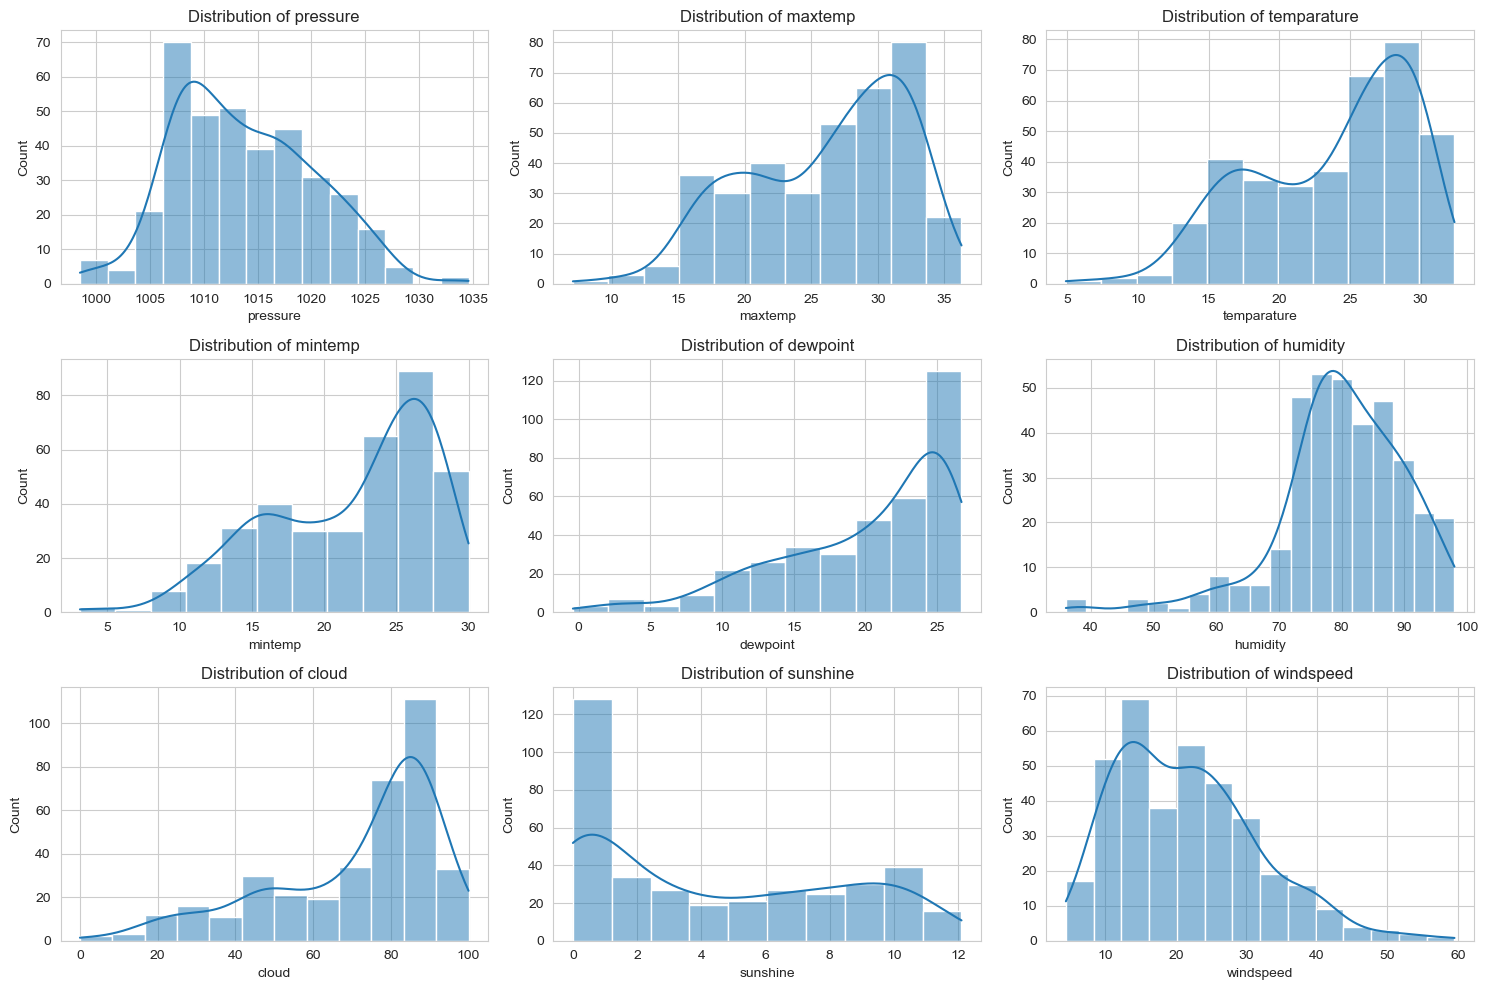

In [30]:
plt.figure(figsize=(15,10))

for i, column in enumerate(['pressure', 'maxtemp', 'temparature', 'mintemp', 'dewpoint', 'humidity', 'cloud', 'sunshine', 'windspeed' ], 1):
  plt.subplot(3,3,i)
  sns.histplot(data[column], kde=True)
  plt.title(f"Distribution of {column}")

plt.tight_layout()
plt.show()

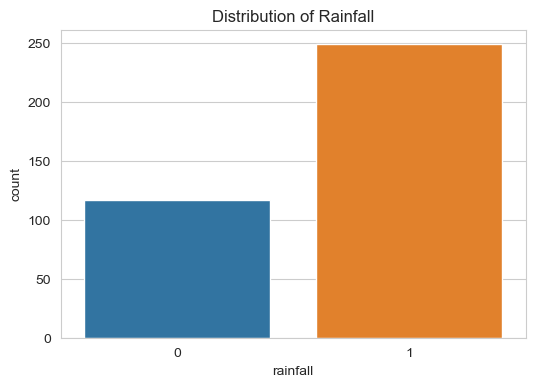

In [33]:
plt.figure(figsize=(6,4))
sns.countplot(x="rainfall", data=data)
plt.title("Distribution of Rainfall")
plt.show()

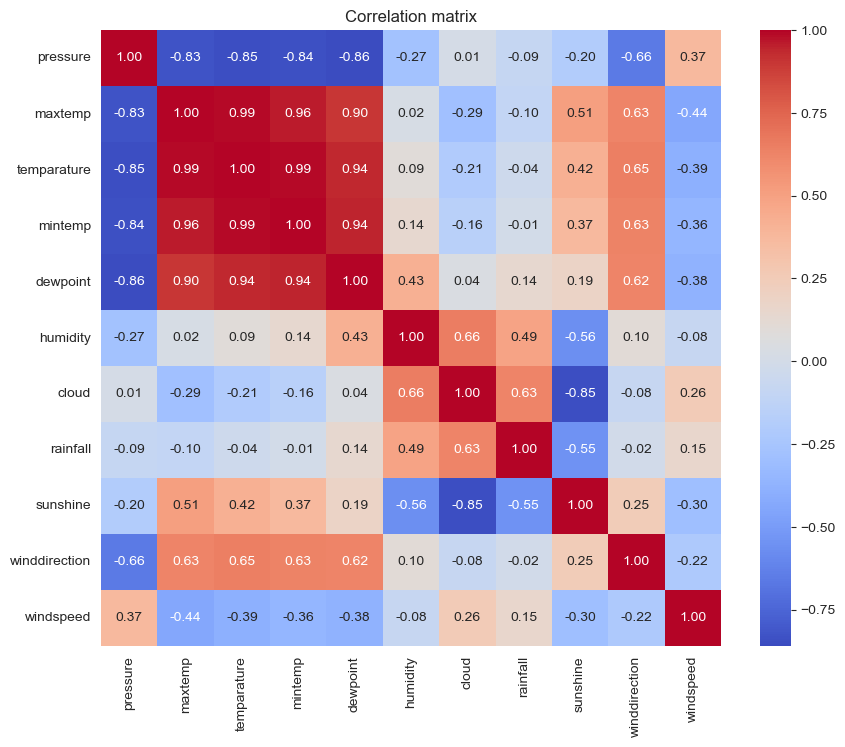

In [34]:
#Correlation matrix
plt.figure(figsize=(10,8))
sns.heatmap(data.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation matrix")
plt.show()

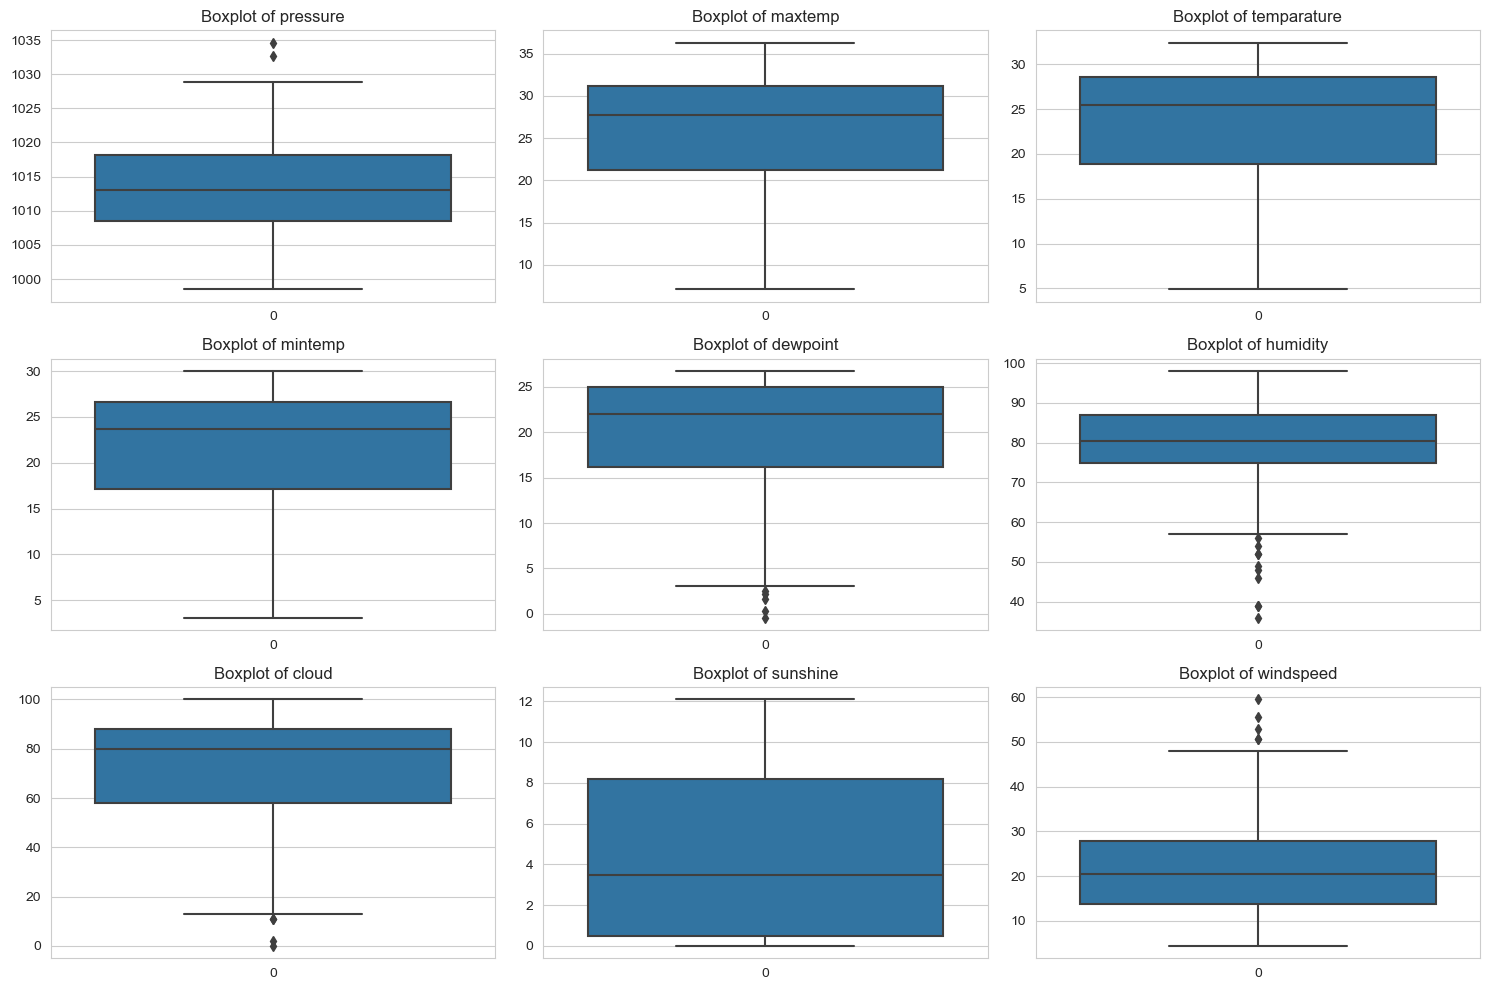

In [36]:
plt.figure(figsize=(15,10))

for i, column in enumerate(['pressure', 'maxtemp', 'temparature', 'mintemp', 'dewpoint', 'humidity', 'cloud', 'sunshine', 'windspeed' ], 1):
  plt.subplot(3,3,i)
  sns.boxplot(data[column])
  plt.title(f"Boxplot of {column}")

plt.tight_layout()
plt.show()

data Preprocessing 

In [39]:
# drop highly correlated column
data = data.drop(columns=['maxtemp','temparature', 'mintemp'])


In [40]:
data.head()

,pressure,dewpoint,humidity,cloud,rainfall,sunshine,winddirection,windspeed
0,1025.9,13.1,72,49,1,9.3,80.0,26.3
1,1022.0,15.6,81,83,1,0.6,50.0,15.3
2,1019.7,18.4,95,91,1,0.0,40.0,14.2
3,1018.9,18.8,90,88,1,1.0,50.0,16.9
4,1015.9,19.9,95,81,1,0.0,40.0,13.7


In [41]:
print(data["rainfall"].value_counts())

rainfall
1    249
0    117
Name: count, dtype: int64


In [43]:
# seprate majority and minority class
df_majority = data[data["rainfall"] == 1]
df_minority = data[data["rainfall"] == 0]
print(df_majority.shape)
print(df_minority.shape)

(249, 8)
(117, 8)


In [44]:
# downsample majority class to match minority count
df_majority_downsampled = resample(df_majority, replace =False, n_samples = len(df_minority), random_state=42)

In [45]:
df_majority_downsampled.shape

(117, 8)

In [46]:
df_downsampled = pd.concat([df_majority_downsampled, df_minority])

In [47]:
df_downsampled.shape

(234, 8)

In [48]:
df_downsampled.head()

,pressure,dewpoint,humidity,cloud,rainfall,sunshine,winddirection,windspeed
188,1005.9,25.6,77,53,1,10.5,270.0,11.3
9,1017.5,15.5,85,91,1,0.0,70.0,37.7
137,1012.3,20.1,80,86,1,0.3,80.0,39.5
89,1018.3,16.3,79,89,1,2.4,40.0,14.8
157,1008.8,24.7,91,80,1,2.2,20.0,11.2


In [50]:
# shuffle the final dataframe
df_downsampled = df_downsampled.sample(frac=1, random_state=42).reset_index(drop=True)

In [51]:
df_downsampled.head()

,pressure,dewpoint,humidity,cloud,rainfall,sunshine,winddirection,windspeed
0,1022.2,14.1,78,90,1,0.0,30.0,28.5
1,1013.4,19.5,69,17,0,10.5,70.0,12.4
2,1006.1,24.4,74,27,0,10.8,220.0,8.7
3,1007.6,24.8,85,84,1,1.8,70.0,34.8
4,1021.2,8.4,66,18,0,10.1,20.0,24.4


In [53]:
df_downsampled["rainfall"].value_counts()

rainfall
1    117
0    117
Name: count, dtype: int64

In [54]:
# slpit features and target as X and y
X = df_downsampled.drop(columns=["rainfall"])
y = df_downsampled["rainfall"]

#### Splitting the data into training data and test data


In [57]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#### Model training 

In [60]:
rf_model = RandomForestClassifier(random_state=42)
param_grid_rf ={
     "n_estimators": [50, 100, 200],  # Number of trees in the forest.
    "max_features": ["sqrt", "log2"],  # The number of features to consider when splitting a node.
    "max_depth": [None, 10, 20, 30],  # The maximum depth of each tree. None means nodes are expanded until all leaves are pure.
    "min_samples_split": [2, 5, 10],  # The minimum number of samples required to split an internal node.
    "min_samples_leaf": [1, 2, 4]     # The minimum number of samples required to be at a leaf node. 
}

In [61]:
# Hypertuning using GridSearchCv
grid_search_rf = GridSearchCV(estimator=rf_model, param_grid=param_grid_rf, cv=5, n_jobs=-1,verbose=2)
grid_search_rf.fit(X_train, y_train)

Fitting 5 folds for each of 216 candidates, totalling 1080 fits


GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [None, 10, 20, 30],
                         'max_features': ['sqrt', 'log2'],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [50, 100, 200]},
             verbose=2)

In [62]:
best_rf_model = grid_search_rf.best_estimator_
print("best parameters for random forest: ",grid_search_rf.best_params_)

best parameters for random forest:  {'max_depth': None, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 10, 'n_estimators': 50}


#### Model Evaluation

In [63]:
cv_scores = cross_val_score(best_rf_model, X_train, y_train, cv=5)
print("Cross-Validation scores:", cv_scores)
print("Mean cross validation score",np.mean(cv_scores))

Cross-Validation scores: [0.68421053 0.84210526 0.83783784 0.83783784 0.91891892]
Mean cross validation score 0.8241820768136557


In [64]:
# test set performance
y_pred = best_rf_model.predict(X_test)
print("Test set Accuracy:", accuracy_score(y_test, y_pred))
print("Test set confusion matrix:\n", confusion_matrix(y_test,y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))


Test set Accuracy: 0.7446808510638298
Test set confusion matrix:
 [[17  7]
 [ 5 18]]
Classification Report:
               precision    recall  f1-score   support

           0       0.77      0.71      0.74        24
           1       0.72      0.78      0.75        23

    accuracy                           0.74        47
   macro avg       0.75      0.75      0.74        47
weighted avg       0.75      0.74      0.74        47



#### Prediction on unknown data

In [65]:
X_train.columns

Index(['pressure', 'dewpoint', 'humidity', 'cloud', 'sunshine',
       'winddirection', 'windspeed'],
      dtype='object')

In [66]:
input_data = (1015.9, 19.9, 95, 81, 0.0, 40.0, 13.7)
input_df = pd.DataFrame([input_data], columns=['pressure','dewpoint','humidity', 'cloud', 'sunshine', 'winddirection', 'windspeed'])



In [67]:
input_df

,pressure,dewpoint,humidity,cloud,sunshine,winddirection,windspeed
0,1015.9,19.9,95,81,0.0,40.0,13.7


In [69]:
prediction = best_rf_model.predict(input_df)
print("Prediction result:", "Rainfall" if prediction[0]==1 else "No rainfall")

Prediction result: Rainfall


In [71]:
# save model and feature name to a pickle file 
model_data = {"model": best_rf_model, "feature_names": X.columns.tolist()}

with open("rainfall_prediction.pkl", "wb") as file:
    pickle.dump(model_data, file)

#### Load the saved model and file and use it for prediction 

In [72]:
with open("rainfall_prediction.pkl", "rb") as file:
    model_data = pickle.load(file)

In [73]:
model = model_data["model"]
feature_names = model_data["feature_names"]

In [74]:
input_data = (1015.9, 19.9, 95, 81, 0.0, 40.0, 13.7)
input_df = pd.DataFrame([input_data], columns=['pressure','dewpoint','humidity', 'cloud', 'sunshine', 'winddirection', 'windspeed'])



In [75]:
prediction = best_rf_model.predict(input_df)
print("Prediction result:", "Rainfall" if prediction[0]==1 else "No rainfall")

Prediction result: Rainfall
